# S2: Análisis exploratorio de datos

Rodrigo García Manzanas: <rodrigo.manzanas@unican.es>

*Depto. Matemática Aplicada y Ciencias de la Computación*

[R for Data Science](http://r4ds.had.co.nz/index.html)  
![manualRdatascience](figs/manual_R_for_Data_Science.jpg)

## Visualización de datos
### (Dataset de ejemplo: *Iris de Fisher* y *mpg*)

Una de las claves en data science es poder realizar *plots* (gráficos) que ayuden a **entender los datos**. Para ilustrar la importancia de la visualización, en esta sección utilizaremos el dataset de **Iris de Fisher** (también llamado Iris de Anderson) (https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="figs/iris_setosa.jpg" width= "250"/> <img src="figs/iris_virginica.jpg" width= "220"/> <img src="figs/iris_versicolor.jpg" width= "240"/> 

Este conjunto de datos contiene 150 muestras de tres especies distintas de Iris (**setosa**, **virginica** e **versicolor**). Cada muestra/observación/instancia contiene cuatro medidas: **largo y ancho del sépalo** y **largo y ancho del pétalo**. En base a la combinación de estas cuatro variables, Fisher desarrolló un modelo discriminante para distinguir entre una especie y otra. 

Este dataset se encuentra en formato **csv** en Kaggle (https://www.kaggle.com/uciml/iris ). Lo podemos leer (una vez descargado) en nuestra sesión de R con la función `read.csv` o `read.table`:

In [1]:
iris.kagg <- read.table(file = ".../Iris.csv", sep = ",")

Warning message in file(file, "rt"):
“cannot open file '.../Iris.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


El dataset *Iris de Fischer* también se encuentra disponible en el paquete `datasets`, que se carga automáticamente en memoria al abrir una instancia de R:

In [4]:
?iris

Podemos consultar cuál es la estructura de `iris` con la función `str()`:

In [5]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


La función de visualización básica de R es `plot`:

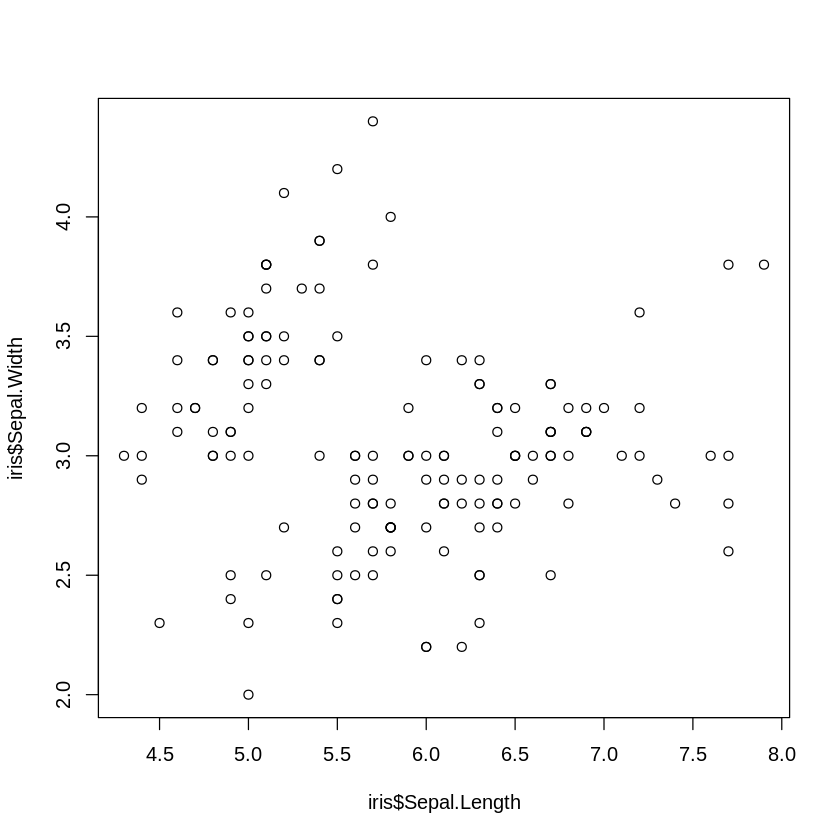

In [6]:
plot(iris$Sepal.Length, iris$Sepal.Width)

Vamos a crear ahora la misma gráfica pero **diferenciando con colores las diferentes especies de Iris**. Para ello realizaremos una pequeña transformación de los datos tal y como se muestra a continuación:

In [7]:
levels(iris$Species)  # las tres especies

# extraigo los datos que corresponden únicamente a la especie de Iris Setosa
ind.setosa <- which(iris$Species == "setosa") #Which selecciona índices en base a trues o falses
str(iris[ind.setosa, ])

# la función `subset` nos permite hacer lo mismo en un solo paso
setosa <- subset(iris, Species == "setosa")
str(setosa)

[1] "setosa"     "versicolor" "virginica"

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Si aplicamos `subset()` para cada una de las especies, mediante las funciones `plot` y `points` podemos diferenciarlas en un mismo gráfico:

In [8]:
versicolor <- subset(iris, Species == "versicolor")
virginica <- subset(iris, Species == "virginica")

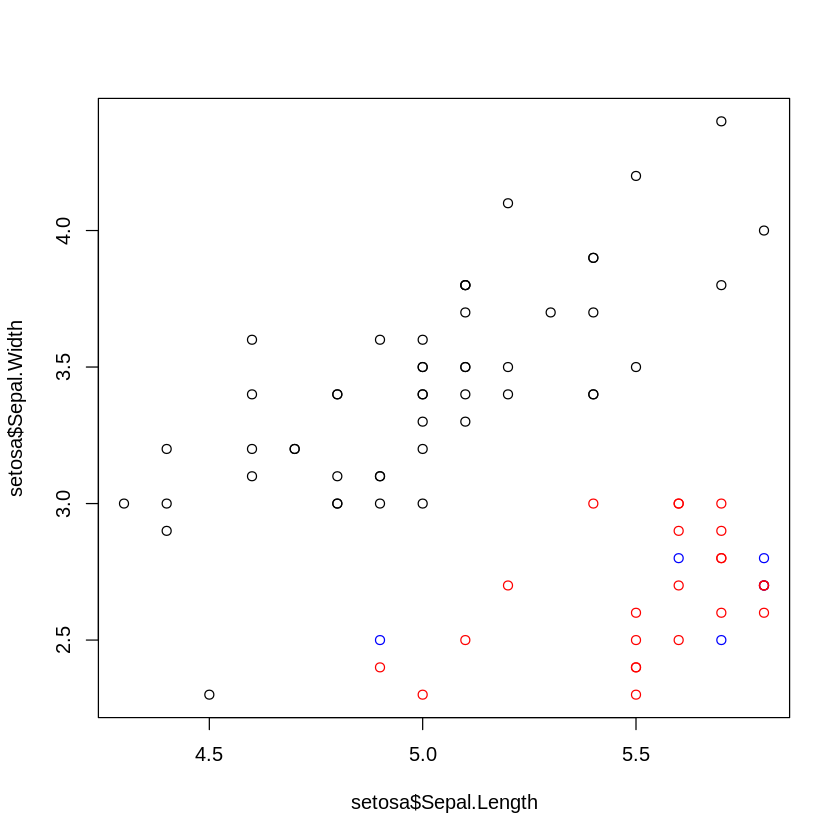

In [11]:
plot(setosa$Sepal.Length, setosa$Sepal.Width)
points(virginica$Sepal.Length, virginica$Sepal.Width, col = "blue") #Points fuerza a replotear sobre el gráfico existente (como el replot en gnuplot)
points(versicolor$Sepal.Length, versicolor$Sepal.Width, col = "red")
#Al estar forzado al plot original, los datos que se salen del rango no se plotean.

Este mismo plot se podría haber hecho directamente pasándole al argumento `col` la variable `Species`:

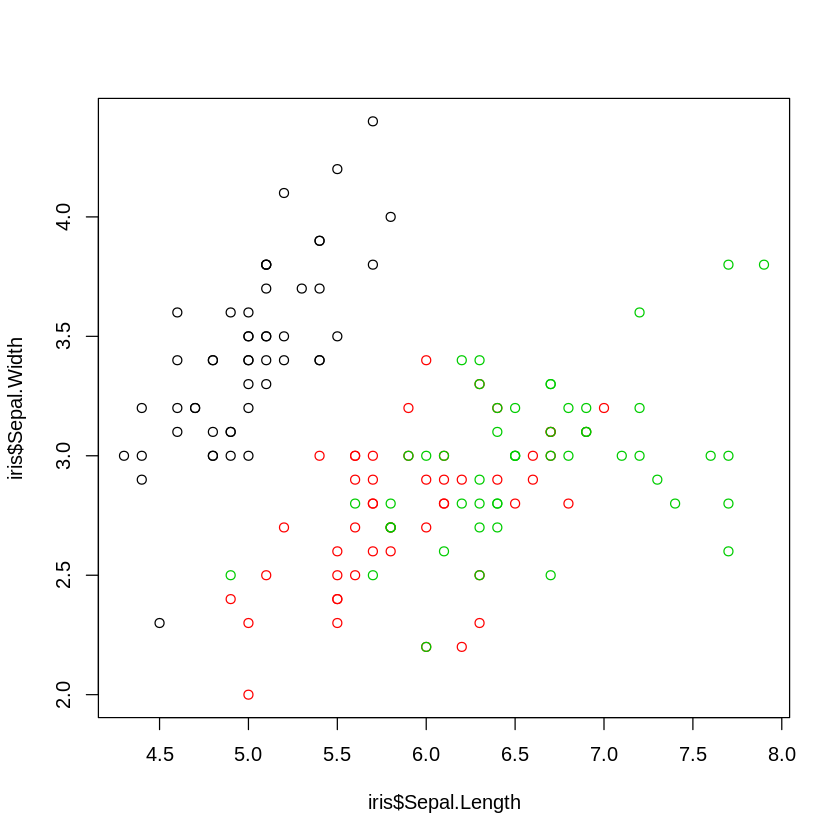

In [12]:
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species) #Le da un color diferente según la especie

Algunos argumentos opcionales de `plot`:

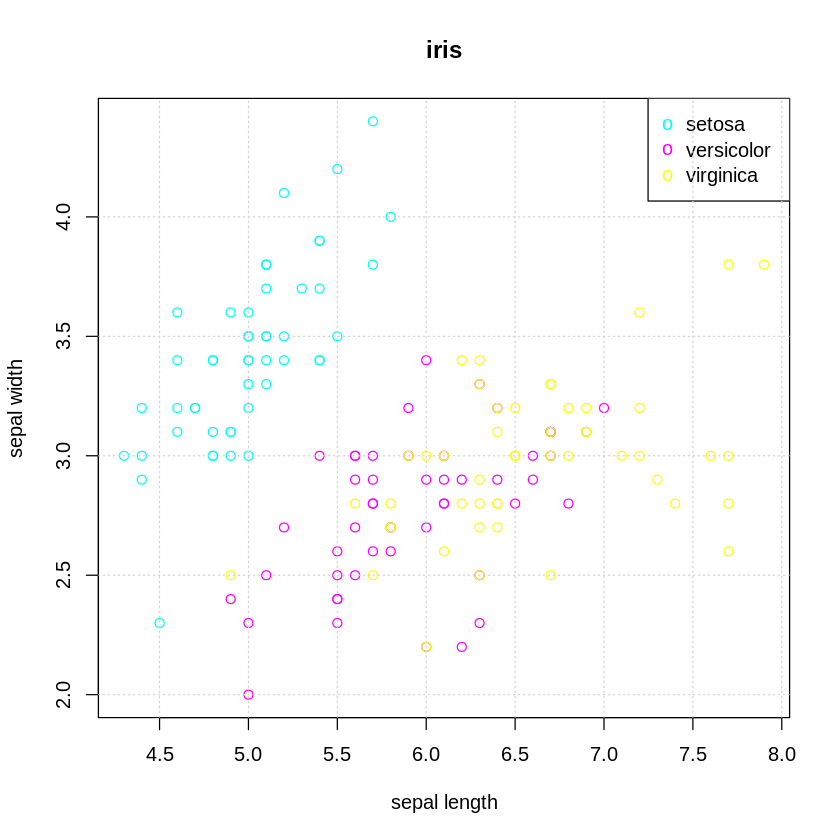

In [13]:
plot(iris$Sepal.Length, iris$Sepal.Width, 
     col = c("cyan", "magenta", "yellow")[iris$Species],
    xlab = "sepal length", ylab = "sepal width",    #Nombres a los ejes
    main = "iris")    #título de la figura
legend("topright", levels(iris$Species), pch = "o", col = c("cyan", "magenta", "yellow")) #leyenda: posicion, datos en leyenda, forma, color
grid()

Existen librerías más potentes para la visualización de datos, por ejemplo, `ggplot` o `lattice`:

In [17]:
# install.packages("lattice")  # instalamos lattice
library(lattice)  # cargamos en memoria lattice

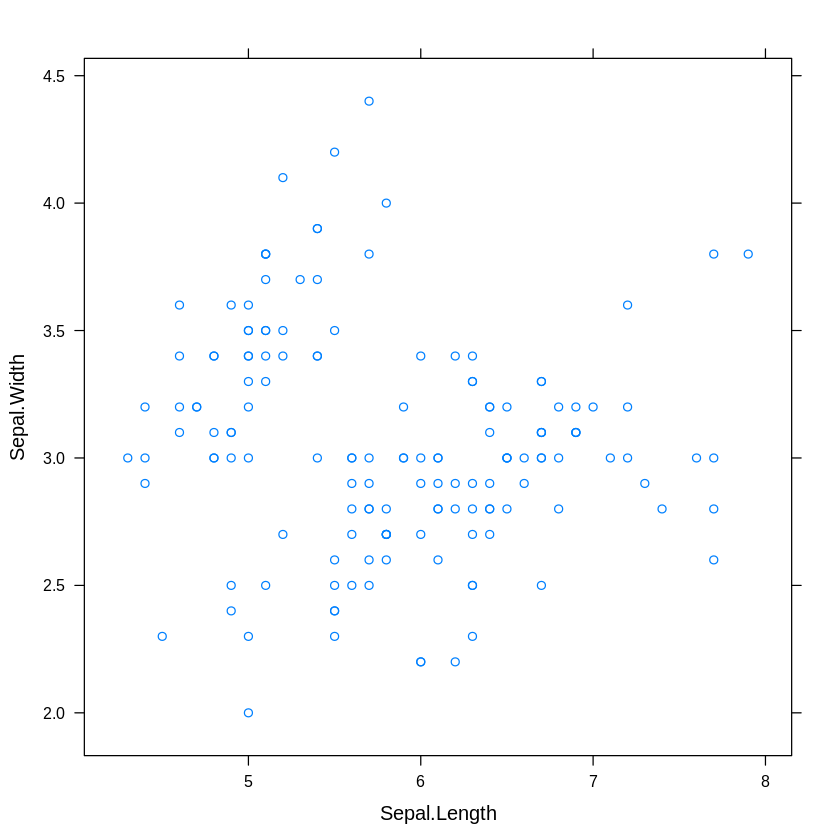

In [19]:
# función xyplot -- hace scatter plots pero con argumentos un poco más chulos
xyplot(Sepal.Width ~ Sepal.Length, data = iris)

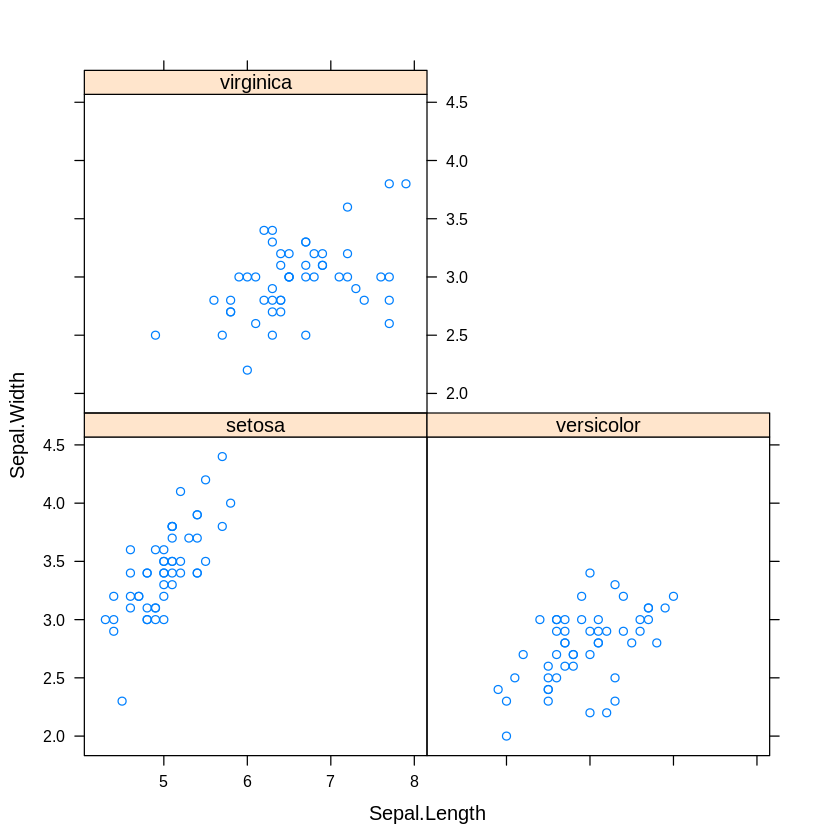

In [21]:
xyplot(Sepal.Width ~ Sepal.Length | Species, data = iris) #Diferencia una especie de otra y hace tres plots

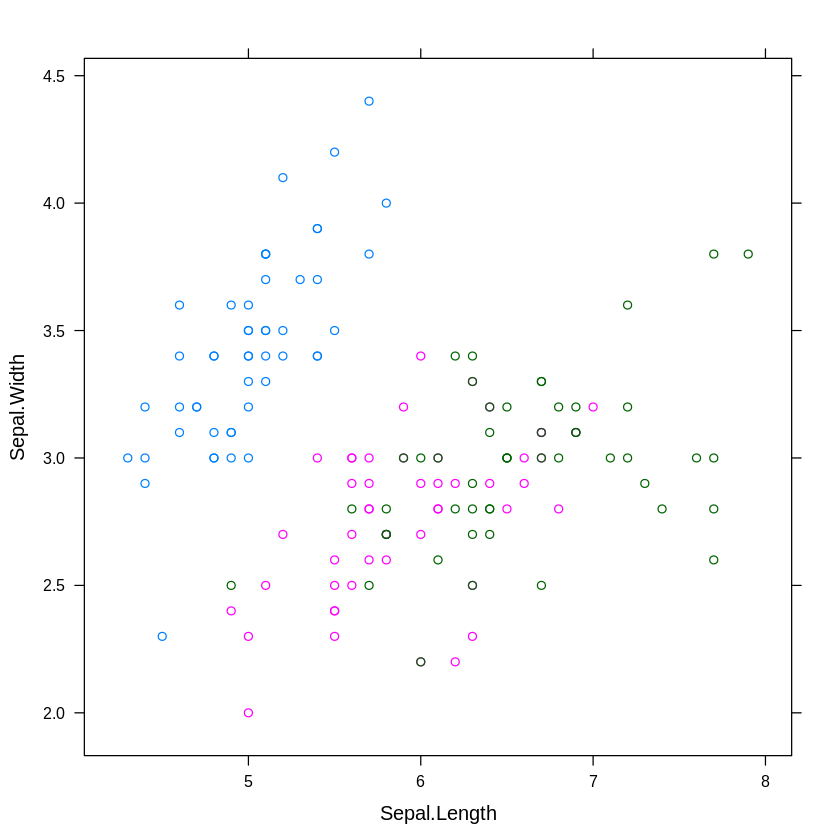

In [22]:
xyplot(Sepal.Width ~ Sepal.Length, group = Species, data = iris)

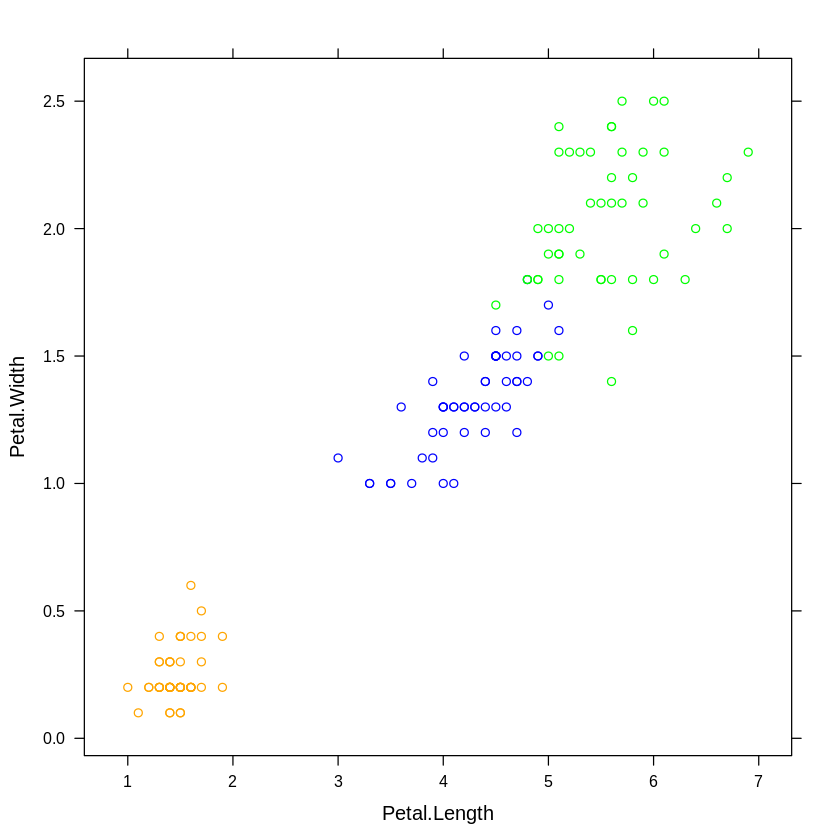

In [24]:
xyplot(Petal.Width ~ Petal.Length, group = Species, data = iris, #Pitamos el pétalo en lugar del sépalo
              col = c("orange", "blue", "green"))

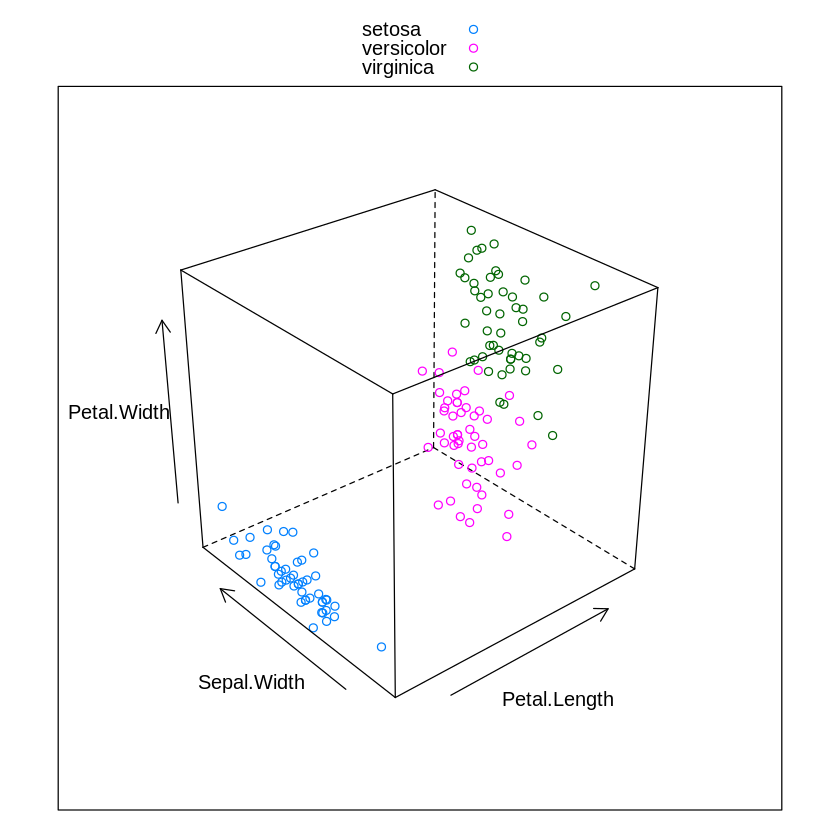

In [26]:
# función cloud: 3-D scatter-plot
cloud(Petal.Width ~ Petal.Length * Sepal.Width, 
      group = Species, data = iris,
    auto.key = TRUE) #Saca la leyenda de modo automático

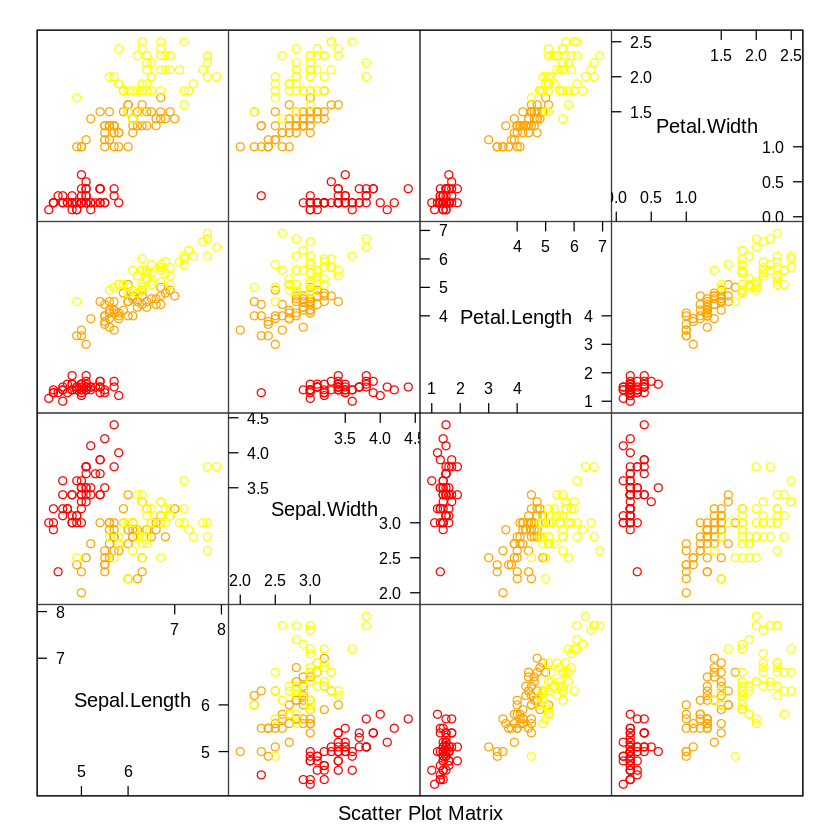

In [27]:
# función splom: matriz de scatter-plots
splom(~iris[1:4], groups = Species, data = iris,
     col = c("red", "orange", "yellow"))

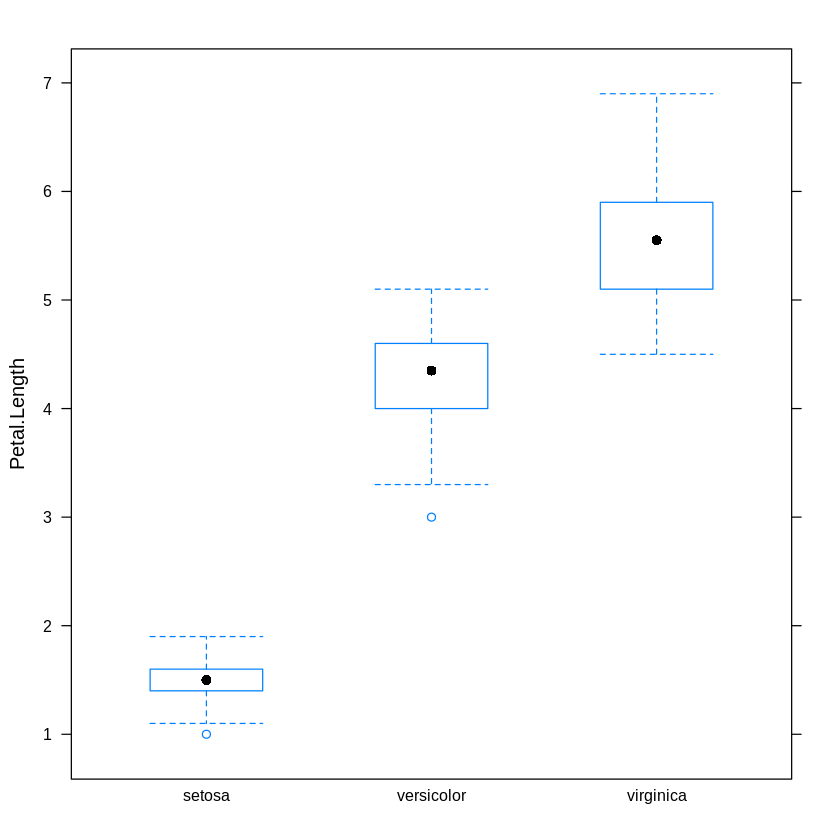

In [28]:
# función bwplot: box-and-whisker plots
bwplot(Petal.Length ~ Species, data = iris)

### El paquete tidyverse
#### Datasets de ejemplo: *Iris de Fisher* y *mpg*

In [31]:
#install.packages("tidyverse")
library(tidyverse)

In [34]:
#x <- c("ggplot2","dplyr","tidyr","readr","purrr","tibble","stringr","forcats")
#install.packages(x)
#Para instalar fuera del hub: Instalamos estos paquetes y luego el tidyverse entero

In [2]:
#library(tidyverse)
library("ggplot2")
library("dplyr")
library("tidyr")
library("readr")
library("purrr")
library("tibble")
library("stringr")
library("forcats")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




La librería tidyverse carga a su vez las siguientes librerías: 
   * **ggplot2**, para visualizar datos.
   * **dplyr**, para manipular datos.
   * **tidyr**, para ordenar datos.
   * **readr**, para importar datos.
   * **purrr**, para programar funciones.
   * **tibble**, para la manipulación de `tibbles`, la versión moderna de los `data.frames`.
   * **stringr**, para manipular cadenas de caracteres (character strings).
   * **forcats**, para manipular factores.
   
En el siguiente ejemplo utilizamos `ggplot()` (paquete `ggplot2`) para visualizar los datos de *iris*.
 
**Se comienza una gráfica con la función `ggplot()`**, que crea un sistema de coordenadas al que **se pueden agregar nuevas capas con el operador `+`**. Por ejemplo, podemos crear un gráfico vacío con `ggplot(data = mpg)` y completarlo con una capa de puntos (un scatter) generada por la función `geom_point`:

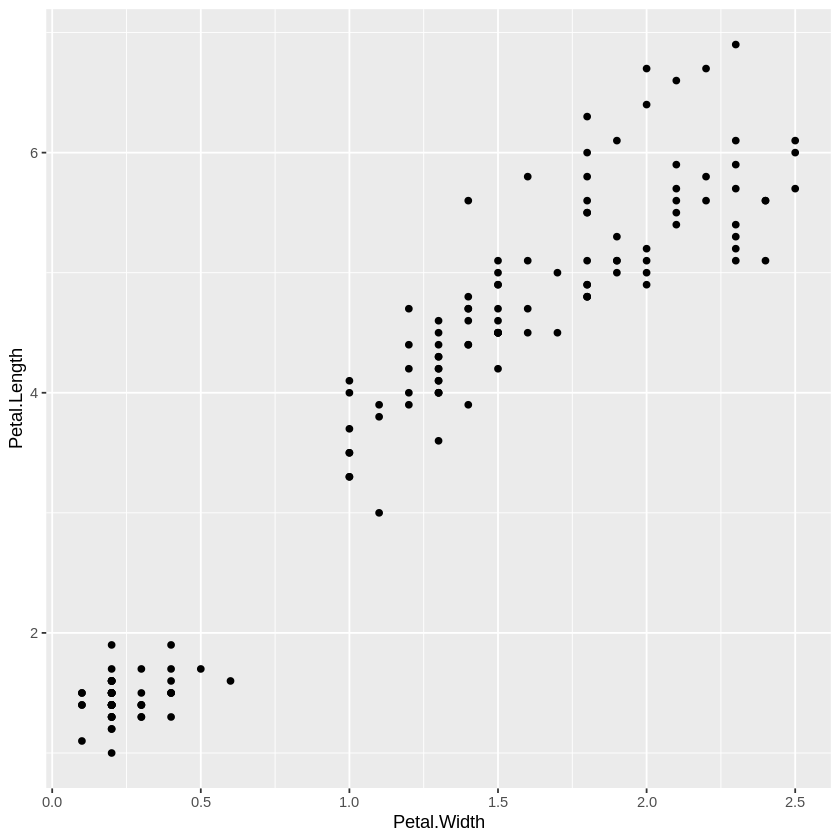

In [7]:
# scatter-plot
ggplot(data = iris) + #abre la gráfica y pone los ejes coordenados
geom_point(aes(x = Petal.Width, y = Petal.Length)) # Primera capa (encima de la base) pintamos puntos geométricos (geom_point)

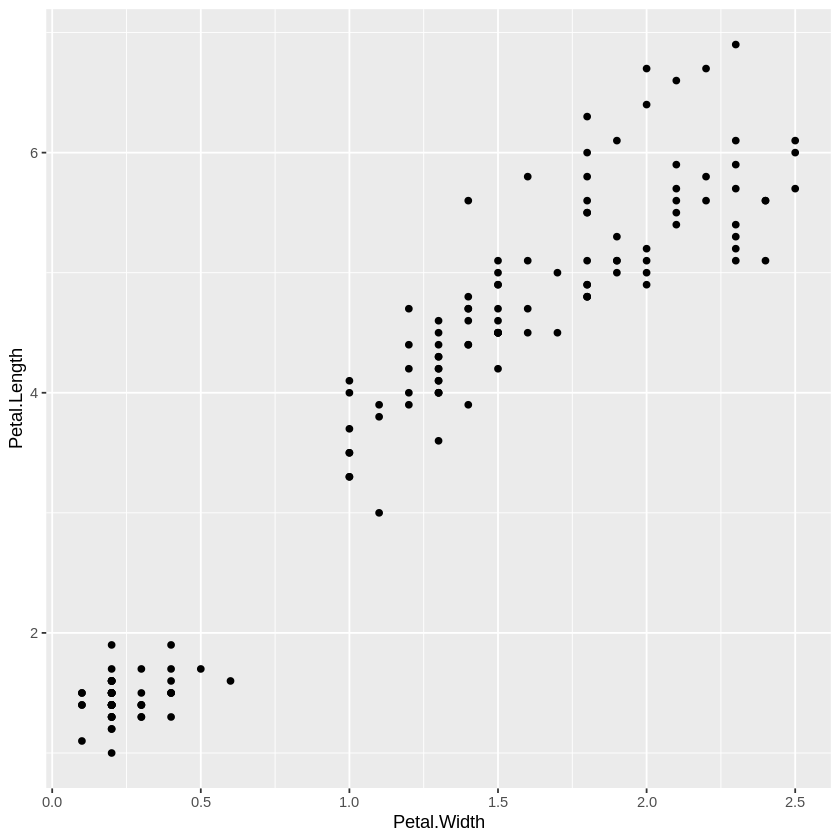

In [37]:
# scatter-plot 
#LO MISMO PERO DE OTRA MANERA
ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length)) +
geom_point()

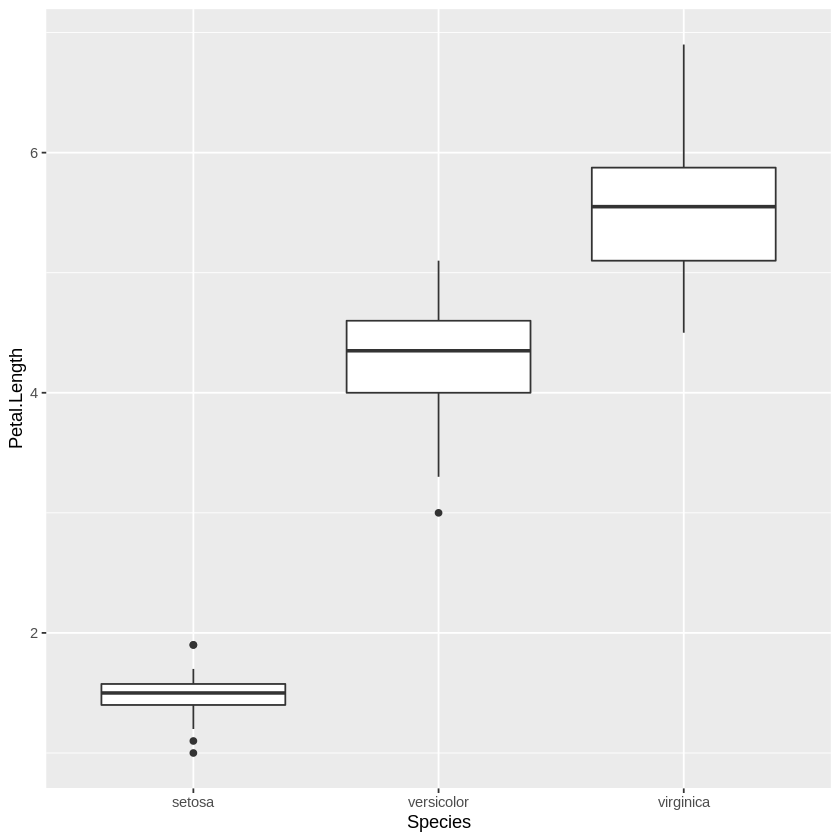

In [38]:
# boxplots
ggplot(data = iris) +
geom_boxplot(aes(Species, Petal.Length))

Podemos convertir el data frame *iris* a un objeto de tipo *tibble*:

In [39]:
# convierto data.frame a tibble
class(iris)
iris <- as_tibble(iris)
class(iris)

[1] "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

De aquí en adelante utilizaremos el dataset *mpg* (datos de consumo de combustible) incluido en el paquete *ggplot2* (dejamos el Iris y utilizamos otros datos):

In [40]:
data(package = "ggplot2")  # cargo los datasets incluidos en 'ggplot2'

---
### Ejercicio 1

¿Qué clase de objeto es `mpg`? ¿Cúantas observaciones contiene? ¿De qué variables? ¿De qué tipo es cada variable?

In [48]:
# solución
class(mpg)
str(mpg)
unique(mpg$class) #unique saca una vez los valores repetidos del dataset

[1] "tbl_df"     "tbl"        "data.frame"

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


[1] "compact"    "midsize"    "suv"        "2seater"    "minivan"   
[6] "pickup"     "subcompact"

Utiliza `ggplot` para visualizar `displ` y `hwy`. ¿Qué podemos decir de estas dos variables?
* `displ`, tamaño del motor del coche en litros
* `hwy`, millas recorridas en autovía por cada galón de combustible

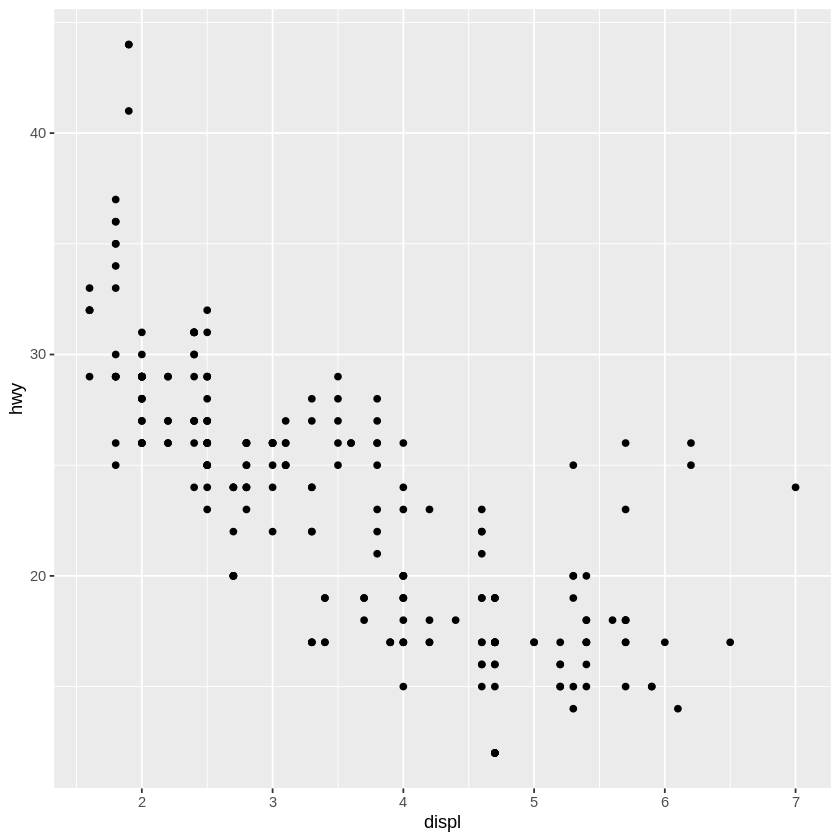

In [46]:
# ggplot(...) + geom_point(...)
ggplot(data = mpg)+
geom_point(aes(x=displ , y= hwy))


Si volvemos a pintar el mismo gráfico pero asociando un color distinto a cada tipo de automóvil (variable `class`) se pueden sacar conclusiones interesantes

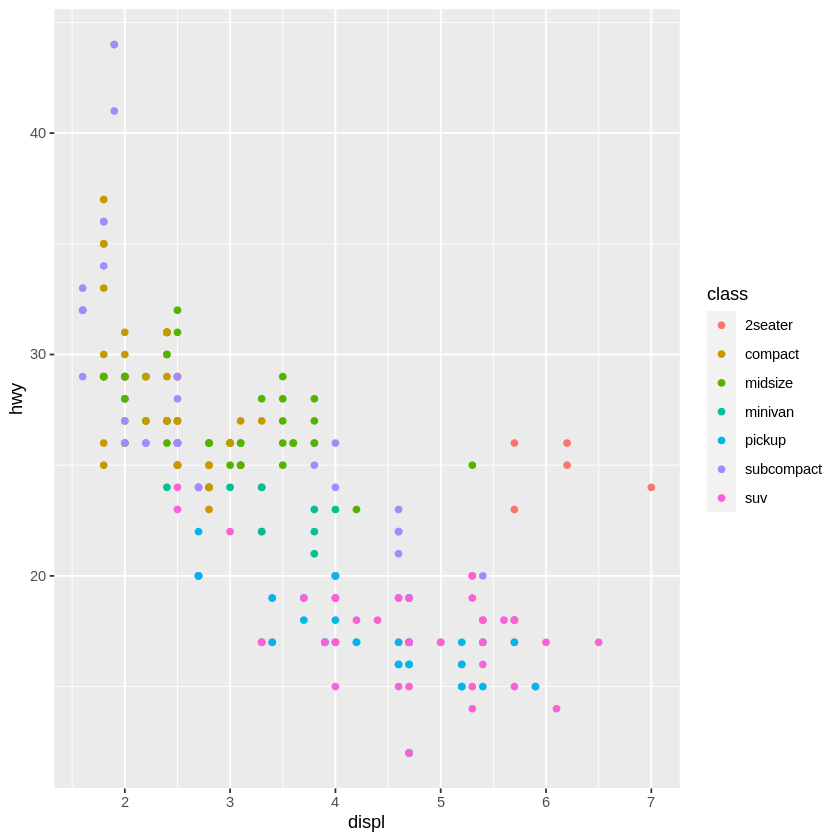

In [47]:
ggplot(mpg) + geom_point(aes(x = displ, y = hwy, color = class))

---
### Ejercicio 2

1) Crea un gráfico de puntos (`displ` vs `hwy`) con `ggplot` donde los puntos se diferencien por color (`color`) para una variable categórica (por ejemplo `class`) y por tamaño de punto (`size`) para una variable continua (por ejemplo `cty`).

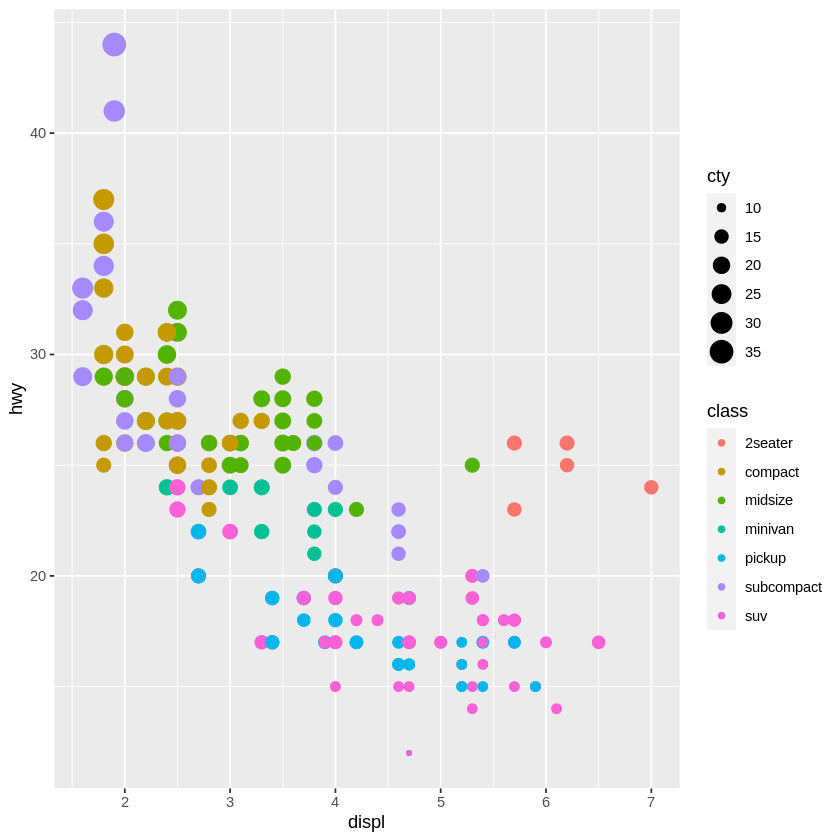

In [49]:
# solución
ggplot(mpg) +
geom_point(aes(x = displ, y = hwy, color = class, size = cty))

2) Trata de diferenciar los puntos del gráfico con formas diferentes (`shape`) para aquellos que corresponden a un `cty`>= 20 y los que corresponden a un `cty` < 20

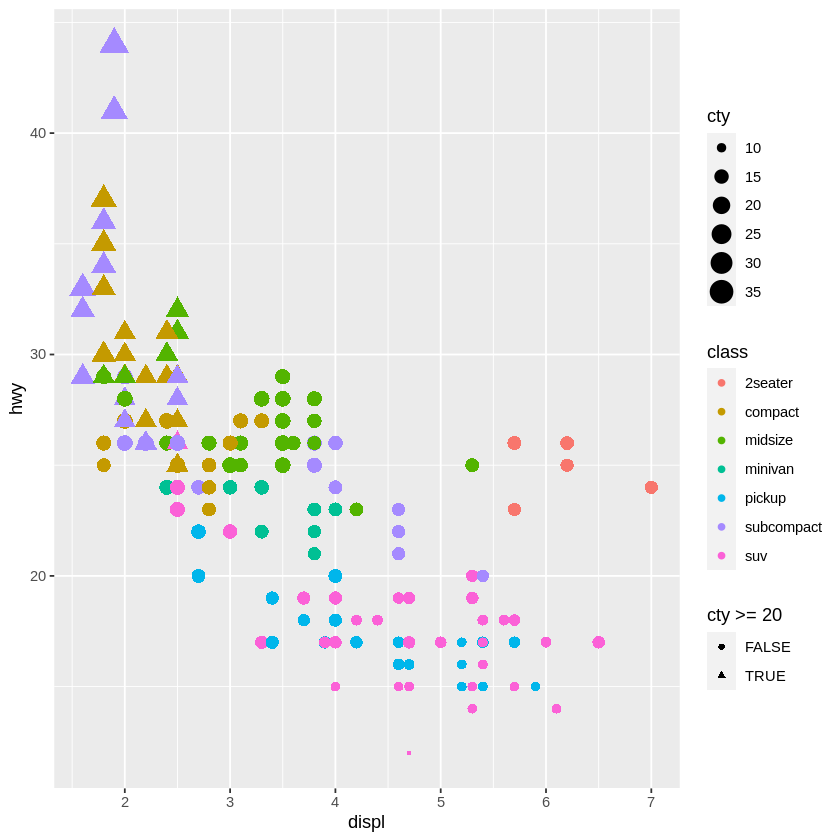

In [52]:
# solución
ggplot(mpg) +
geom_point(aes(x = displ, y = hwy, color = class, size = cty, shape = cty >=20))


Otra estrategia útil para diferenciar grupos de puntos es utilizar `facet_wrap()` como una capa más de `ggplot`.

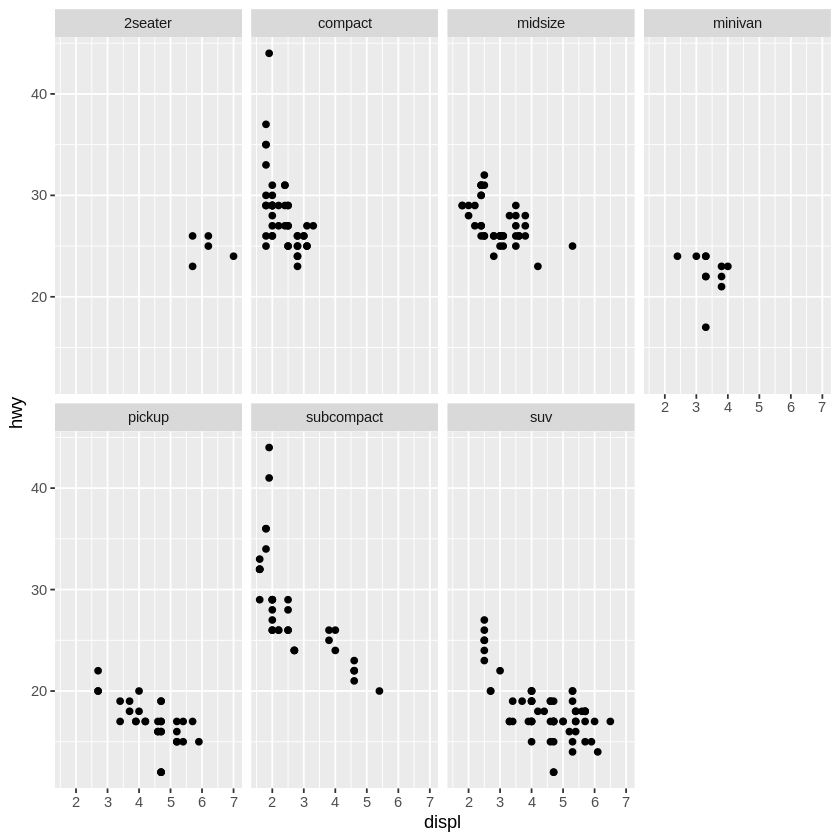

In [54]:
ggplot(data = mpg) + 
  geom_point(aes(x = displ, y = hwy)) + 
  facet_wrap(~class, nrow = 2) #Pinta lo que pidas filtrando por clases en este caso

## Transformación de datos
### (Dataset de ejemplo: *flights*)

La visualización es una herramienta importante para la generación de información, pero es raro obtener los datos en la forma en que se requiere para poder graficarla directamente. A menudo, será necesario crear nuevas variables, generar información sintetizada, reordenar observaciones, cambiar el tipo y/o nombre de algunas variables... para que sea más fácil trabajar con los datos.

Continuando con el uso de los paquetes de `tidyverse`, utilizaremos el paquete **`dplyr`** para transformar el dataset `flights` (flights departing New York City in 2013), contenido en el paquete `nyflights13`.

In [60]:
#install.packages("nycflights13")
load("data/flights.rda")
str(flights)
#?flights

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

Las cinco **funciones clave de `dplyr`** que permiten resolver la gran mayoría de los problemas de manipulación de datos son las siguientes:

  * **filter()**, extrae subconjuntos de datos en función de sus valores.
  * **arrange()**, reordena filas.
  * **select()**, extrae variables por su nombre.
  * **mutate()**, crea nuevas variables a partir de las existentes.
  * **summarise()**, proporciona un resumen.

### Filtrar filas

Mediante el uso de los operadores comparativos: **>, >=, <, <=, !=, ==**

In [61]:
jan1 <- filter(flights, month == 1, day == 1)
str(jan1)

tibble [842 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:842] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:842] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:842] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:842] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:842] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:842] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:842] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:842] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:842] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:842] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:842] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:842] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:842] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr [1:842] "IAH" "IAH" "MIA" "BQN" ...
 $ ai

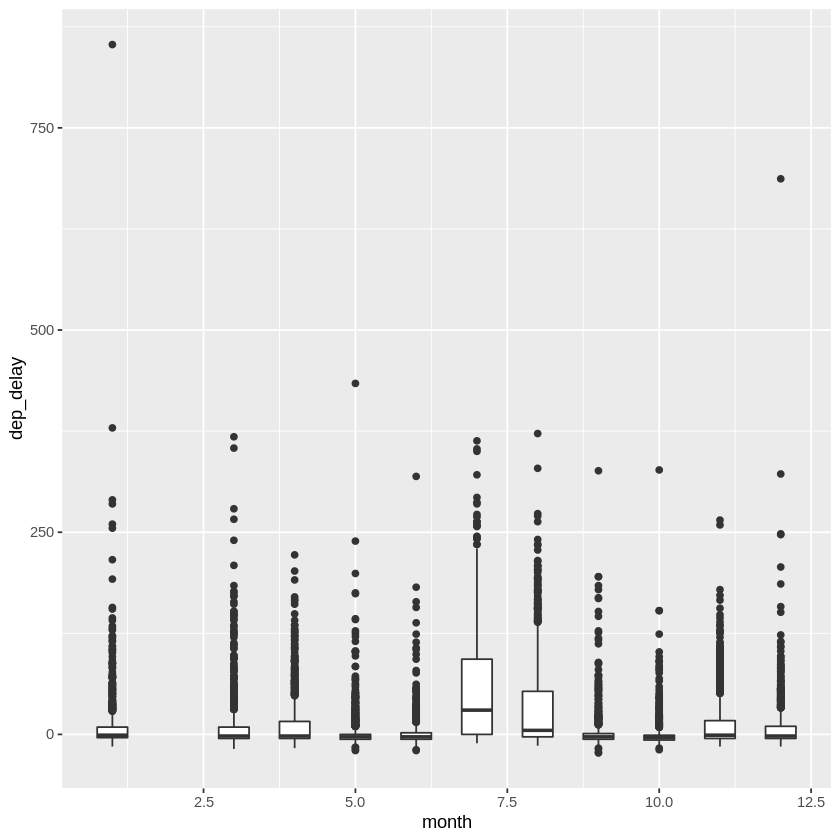

In [62]:
month1 <- filter(flights, month != 2, day == 1)
ggplot(data = month1) +
geom_boxplot(aes(x = month, y = dep_delay, group = month), 
             width = 0.5, na.rm = TRUE)

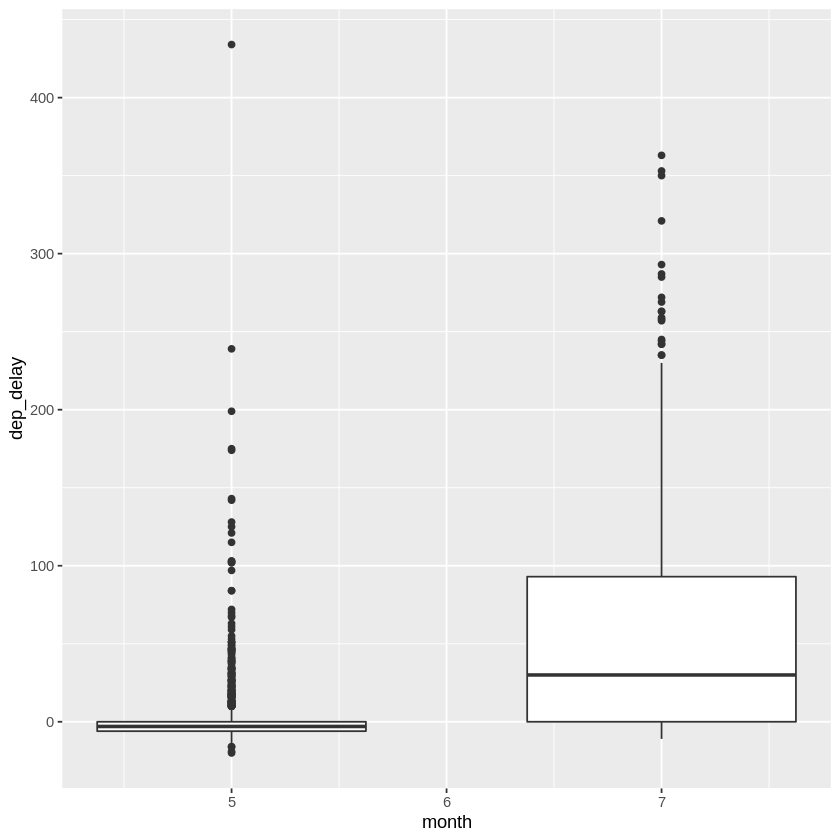

In [63]:
month2 <- filter(flights, month == 5 | month == 7, day == 1)
ggplot(month2) +
geom_boxplot(aes(x = month, y = dep_delay, group = month), 
                 width = 1.25, na.rm = TRUE)

### Ordenar filas

[1] "tbl_df"     "tbl"        "data.frame"

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 6 1 9 7 4 3 6 7 12 ...
 $ day           : int [1:336776] 9 15 10 20 22 10 17 27 22 5 ...
 $ dep_time      : int [1:336776] 641 1432 1121 1139 845 1100 2321 959 2257 756 ...
 $ sched_dep_time: int [1:336776] 900 1935 1635 1845 1600 1900 810 1900 759 1700 ...
 $ dep_delay     : num [1:336776] 1301 1137 1126 1014 1005 ...
 $ arr_time      : int [1:336776] 1242 1607 1239 1457 1044 1342 135 1236 121 1058 ...
 $ sched_arr_time: int [1:336776] 1530 2120 1810 2210 1815 2211 1020 2226 1026 2020 ...
 $ arr_delay     : num [1:336776] 1272 1127 1109 1007 989 ...
 $ carrier       : chr [1:336776] "HA" "MQ" "MQ" "AA" ...
 $ flight        : int [1:336776] 51 3535 3695 177 3075 2391 2119 2007 2047 172 ...
 $ tailnum       : chr [1:336776] "N384HA" "N504MQ" "N517MQ" "N338AA" ...
 $ origin        : chr [1:336776] "JFK" "JFK" "EWR" "

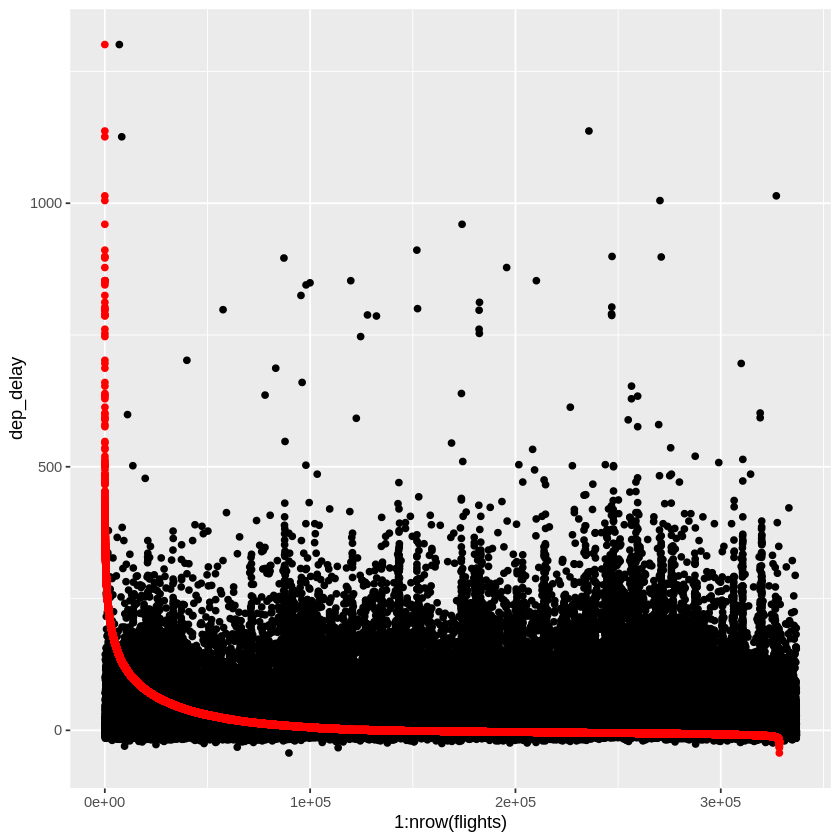

In [64]:
# ¿Qué crees que hará el siguiente código? Reordenar las columnas según el retraso de salida en orden descendiente
bydelay <- arrange(flights, desc(dep_delay))
class(bydelay)
str(bydelay)

ggplot(flights) +
geom_point(aes(1:nrow(flights), dep_delay), na.rm = TRUE) + #na.rm=TRUE lo que hace es tirar para alante con los valores NA
geom_point(aes(1:nrow(flights), bydelay$dep_delay), color = "red", na.rm = TRUE)

---
### Ejercicio 3

¿Qué día tuvo lugar el vuelo más largo? ¿Y el más corto?

In [65]:
# solución
bytime <- arrange(flights, desc(air_time)) #Reordenamos el dataset en funcion del tiempo de vuelo
class(bytime)
str(bytime)

bytime = bytime[!is.na(bytime$air_time), ]  # excluyo los días sin datos para 'air_time'

bytime[1, ]  # vuelo más largo: 17 Marzo (695)
bytime[1, ]$air_time

bytime[nrow(bytime), ]  # vuelo más corto: 13 Abril (20)
bytime[nrow(bytime), ]$air_time

[1] "tbl_df"     "tbl"        "data.frame"

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 3 2 3 3 3 2 11 3 11 3 ...
 $ day           : int [1:336776] 17 6 15 17 16 5 12 14 20 15 ...
 $ dep_time      : int [1:336776] 1337 853 1001 1006 1001 900 936 958 1006 1342 ...
 $ sched_dep_time: int [1:336776] 1335 900 1000 1000 1000 900 930 1000 1000 1335 ...
 $ dep_delay     : num [1:336776] 2 -7 1 6 1 0 6 -2 6 7 ...
 $ arr_time      : int [1:336776] 1937 1542 1551 1607 1544 1555 1630 1542 1639 1924 ...
 $ sched_arr_time: int [1:336776] 1836 1540 1530 1530 1530 1540 1530 1530 1555 1836 ...
 $ arr_delay     : num [1:336776] 61 2 21 37 14 15 60 12 44 48 ...
 $ carrier       : chr [1:336776] "UA" "HA" "HA" "HA" ...
 $ flight        : int [1:336776] 15 51 51 51 51 51 15 51 51 15 ...
 $ tailnum       : chr [1:336776] "N77066" "N389HA" "N388HA" "N380HA" ...
 $ origin        : chr [1:336776] "EWR" "JFK" "JFK" "JFK" ...
 $

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,3,17,1337,1335,2,1937,1836,61,UA,15,N77066,EWR,HNL,695,4963,13,35,2013-03-17 13:00:00


[1] 695

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,4,13,537,527,10,622,628,-6,EV,4631,N12167,EWR,BDL,20,116,5,27,2013-04-13 05:00:00


[1] 20

### Seleccionar columnas

In [66]:
# seleccionar por el nombre de la columna con select()
print(select(flights, year, month, day))

# seleccionar todas las columnas entre "year" y "day"
print(select(flights, year:day))

# seleccionar todas las columnas excepto las que están entre "year" y "day"
print(select(flights, -(year:day))) #El - indica "excepto"

# A tibble: 336,776 x 3
    year month   day
   <int> <int> <int>
 1  2013     1     1
 2  2013     1     1
 3  2013     1     1
 4  2013     1     1
 5  2013     1     1
 6  2013     1     1
 7  2013     1     1
 8  2013     1     1
 9  2013     1     1
10  2013     1     1
# … with 336,766 more rows
# A tibble: 336,776 x 3
    year month   day
   <int> <int> <int>
 1  2013     1     1
 2  2013     1     1
 3  2013     1     1
 4  2013     1     1
 5  2013     1     1
 6  2013     1     1
 7  2013     1     1
 8  2013     1     1
 9  2013     1     1
10  2013     1     1
# … with 336,766 more rows
# A tibble: 336,776 x 16
   dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay carrier
      <int>          <int>     <dbl>    <int>          <int>     <dbl> <chr>  
 1      517            515         2      830            819        11 UA     
 2      533            529         4      850            830        20 UA     
 3      542            540         2      923        

Hay una serie de funciones "helper" que pueden utilizarse dentro de la función `select()`. Algunas de ellas son las siguientes:

   * `last_col()`
   * `starts_with("abc")`
   * `ends_with("xyz")`
   * `contains("ijk")`

In [68]:
flight_times <- select(flights, ends_with("time"))
str(flight_times)

tibble [336,776 × 5] (S3: tbl_df/tbl/data.frame)
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ air_time      : num [1:336776] 227 227 160 183 116 150 158 53 140 138 ...


### Añadir nuevas variables

Además de seleccionar conjuntos de columnas existentes, a menudo es útil agregar nuevas columnas que son funciones de columnas existentes. Para esto se utiliza la función `mutate()`.

`mutate()` siempre agrega nuevas columnas al final de un conjunto de datos, por lo que utilizaremos un subconjunto de `fights` (usando `select()`) para que podamos ver las nuevas variables. 

In [70]:
# selección de variables dentro de flights
flights.sml <- select(flights, 
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
)
names(flights.sml)

# agrego dos nuevas variables a flights_sml
flights.sml2 = mutate(flights.sml,
  gain = dep_delay - arr_delay,
  speed = distance / air_time * 60
)
print(flights.sml2)

[1] "year"      "month"     "day"       "dep_delay" "arr_delay" "distance" 
[7] "air_time"

# A tibble: 336,776 x 9
    year month   day dep_delay arr_delay distance air_time  gain speed
   <int> <int> <int>     <dbl>     <dbl>    <dbl>    <dbl> <dbl> <dbl>
 1  2013     1     1         2        11     1400      227    -9  370.
 2  2013     1     1         4        20     1416      227   -16  374.
 3  2013     1     1         2        33     1089      160   -31  408.
 4  2013     1     1        -1       -18     1576      183    17  517.
 5  2013     1     1        -6       -25      762      116    19  394.
 6  2013     1     1        -4        12      719      150   -16  288.
 7  2013     1     1        -5        19     1065      158   -24  404.
 8  2013     1     1        -3       -14      229       53    11  259.
 9  2013     1     1        -3        -8      944      140     5  405.
10  2013     1     1        -2         8      733      138   -10  319.
# … with 336,766 more rows


## Importar (leer) y exportar (escribir) datos

### (Dataset de ejemplo: *Iris de Fisher* y *flights*)

Trabajar con los datos proporcionados por los paquetes de R es una excelente manera de familiarizarse con las herramientas más comunes en data science, pero en algún momento necesitaréis comenzar a trabajar con vuestros propios datos. Utilizaremos el paquete **`readr`**, que es también parte de `tidyverse`.

### Leer datos
La mayoría de las funciones de lectura convierten archivos de texto planos en data frames:

* `read_csv()` lee archivos delimitados por comas, `read_csv2()` lee archivos separados por punto y coma, `read_tsv()` lee archivos delimitados por tabulaciones, y `read_delim()` lee archivos con cualquier delimitador.

* `read_fwf()` lee archivos de ancho fijo. Se pueden especificar campos por su ancho con `fwf_widths()` o su posición con `fwf_positions()`.

* `read_table()` lee una variación común de archivos de ancho fijo donde las columnas están separadas por espacios en blanco.

* `read_log()` lee archivos de configuración de tipo Apache (ver https://www.screamingfrog.co.uk/an-seos-guide-to-apache-log-files/)

In [9]:
iris <- read_csv(".../Iris.csv")
str(iris)

ERROR: Error: '.../Iris.csv' does not exist in current working directory ('/home/jovyan/IntroR').


También podemos pasar a `read_csv` un csv que generemos "al vuelo" en R. Si no se indica lo contrario, la primera línea sirve para dar nombre a las variables que se van a leer a continuación. 

In [10]:
read_csv("a,b,c
1,2,3
4,5,6")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


A veces hay algunas líneas de metadatos en la parte superior del archivo:
* El argumento `skip = n` se usa para omitir las primeras n líneas. 
* El argumento `comment = "#"` se usa para eliminar todas las líneas que comienzan con (por ejemplo #)

In [11]:
read_csv("The first line of metadata
  The second line of metadata
  x,y,z
  1,2,3", skip = 2)

x,y,z
<dbl>,<dbl>,<dbl>
1,2,3


In [12]:
read_csv("# A comment I want to skip
  x,y,z
  1,2,3", comment = "#")

x,y,z
<dbl>,<dbl>,<dbl>
1,2,3


El símbolo `\n` se usa para agregar una nueva línea. Por otra parte, `col_names` permite dar nombres a las columnas. 

In [14]:
# nombrar las columnas automáticamente
read_csv("1,2,3\n4,5,6", col_names = FALSE)  

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Puedes pasar a `col_names` un vector de caracteres que se usará como nombres de columna:

In [13]:
# nombrar las columnas a deseo del usuario
read_csv("1,2,3\n4,5,6", col_names = c("col1", "col2", "col3"))

col1,col2,col3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


El argumento `na` se usa para especificar qué valor (o valores) del archivo son "missing values":

In [15]:
read_csv("a,b,c\n1,2,.", na = ".")

a,b,c
<dbl>,<dbl>,<lgl>
1,2,NA


Las principales ventajas de `read_csv` frente a `read.csv` (de base de R) son:
* Es más rápido.
* Importa los datos a un objeto de clase `tibble`. De manera que:
    - No convierte los "character" a "factor" for defecto
    - No usa nombres de filas
    - No transforma los nombres de columna

---
### Ejercicio 4

Identifica qué está mal en los siguientes csv y corrígelo:

In [18]:
read_csv("a,b\n1,2,3\n4,5,6")
read_csv("a;b\n1;3")

# solución
read_csv("a,b,c\n1,2,3\n4,5,6")
read_csv("a,b\n1,3")

Warning message:
“2 parsing failures.
row col  expected    actual         file
  1  -- 2 columns 3 columns literal data
  2  -- 2 columns 3 columns literal data
”


a,b
<dbl>,<dbl>
1,2
4,5


a;b
<chr>
1;3


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


a,b
<dbl>,<dbl>
1,3


¿Qué función de importación utilizarías para un archivo separado por "|" (e.g. "a|b|c\n1|2|3")? Escribe un ejemplo a continuación:

In [19]:
# solución
read_delim("a|b|c\n1|2|3", delim = "|")

a,b,c
<dbl>,<dbl>,<dbl>
1,2,3


### Escribir datos

`readr` incluye tres funciones útiles para escribir datos en disco: `write_csv()`, `write_delim()` `write_tsv()`

---

### Ejercicio 5

Exporta el dataset `flights` como un fichero csv a tu ordenador, salvando los missing values como -999 (utiliza `?write_csv` como ayuda).

In [ ]:
# solución
#?write_csv
#write_csv(x = flights, file = "ruta_nombre_fichero_salida.csv", na = -999)

---

## Ordenar datos

### (Datasets de ejemplo: *table1*, *table2*, *table3*, ... y *flights*)

A veces nos tenemos que enfrentar a datasets desordenados y complejos. El paquete **`tidyr` ofrece herramientas que ayudan a ordenar datos.** 
Los datos que utilizaremos en esta sección se incluyen en el paquete `tidyr`: `table1`, `table2`, `table4a` y `table4b`

In [20]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [21]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [22]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [23]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [24]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


Todas estas tablas son representaciones del mismo conjunto de datos subyacente, pero no son igualmente fáciles de usar. Nuestro objetivo es obtener un conjunto de datos ordenado.


Hay tres reglas que cumple un **conjunto de datos ordenado**:

* **Cada variable** debe tener su **propia columna**.
* **Cada observación** debe tener su **propia fila**.
* **Cada valor** debe tener su **propia celda**.

![](figs/tidy-1.png)

En este ejemplo, únicamente `table1` está ordenada: es la única representación donde cada columna es una variable.

In [25]:
# añadimos la variable rate a table1
# solución
mutate(table1, rate = cases / population * 10000)

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


Un problema común que nos encontramos en muchos datasets es que algunos **nombres de columnas** no son nombres de variables, sino **valores de una variable**, como ocurre por ejemplo en `table4a` y `table4b`. En estos casos podemos recurrir a la función `gather()`

In [26]:
table4a
tidy4a <- gather(table4a, "1999", "2000", key = "year", value = "cases")
tidy4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [27]:
table4b
tidy4b <- gather(table4b, "1999", "2000", key = "year", value = "population")
tidy4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


Podemos utilizar la función `left_join()` de `dplyr` para combinar `table4a` y `table4b`:

In [28]:
left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


A veces una **observación** está dispersa **en varias filas** (e.g. `table2`, una observación es un país en un año, pero cada observación se distribuye en dos filas). En estos casos podemos recurrir a la función `spread()`. 

In [29]:
table2
tidy2 <- spread(table2, key = type, value = count)
tidy2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


A veces podemos encontrarnos con **una columna** que contiene **dos variables** (e.g. `table3`, la columna `rate` contiene las variables `cases` y `population`). En esos casos podemos recurrir a la función `separate()`. 

In [30]:
table3
tidy3 <- separate(table3, rate, into = c("cases", "population"), sep = "/")
tidy3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


La función `unite()` sería la inversa a `separate()`, ya que nos permite **combinar** múltiples **variables en una única**

In [31]:
unite(tidy3, cases_population, cases, population, sep = "_")

country,year,cases_population
<chr>,<int>,<chr>
Afghanistan,1999,745_19987071
Afghanistan,2000,2666_20595360
Brazil,1999,37737_172006362
Brazil,2000,80488_174504898
China,1999,212258_1272915272
China,2000,213766_1280428583


--- 
### Ejercicio 6

Utiliza el dataset `flights.sml` y la función `unite()` para crear la variable `fecha` que combina el año, el mes y el día.

In [ ]:
# solución
names(flights.sml)
print(unite(flights.sml, fecha, year, month, day, sep = "/"))

---

**Uso de pipes**

Hasta ahora hemos ido ejecutando cada proceso con líneas de código independientes, asignando cada resultado provisional a una nueva variable. Sin embargo, es bastante común ir enlazando código mediante el símbolo `%>%`. Por ejemplo:

In [32]:
data("iris")
iris %>%
group_by(Species) %>%
  summarise(meanSL = mean(Sepal.Length), meanSW = mean(Sepal.Width), 
          meanPL = mean(Petal.Length), meanPW = mean(Petal.Width))

`summarise()` ungrouping output (override with `.groups` argument)



Species,meanSL,meanSW,meanPL,meanPW
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


En el siguiente ejemplo se importa el dataset contenido en el archivo *titanic.csv* y se realizan una serie de operaciones encadenadas con él:

In [36]:
titanic <- read_csv("/home/jovyan/IntroR/data/titanic.csv")
str(titanic)


── Column specification ────────────────────────────────────────────────────────
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)




tibble [891 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ PassengerId: num [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] NA "C85" NA "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  

In [37]:
titanic %>%

  select(-PassengerId, -Name, -Cabin, -Ticket) %>%  # elimino variables

  mutate(Sex = fct_recode(Sex, # modifico los niveles de dos variables tipo factor a mano
           "0" = "male",
           "1" = "female"),
         Embarked = fct_recode(Embarked,
           "1" = "S",
           "2" = "C",
           "3" = "Q")) %>%

  mutate(Sex = as.integer(Sex), # convierto de string a entero para que todas las variables del dataset sean numéricas
         Embarked = as.integer(Embarked)) %>%

  filter(complete.cases(.)) %>%  # elimino missing values

  cor() %>%  # calculo la correlación de cada variable con todas las demás

  abs() %>%  # calculo el valor absoluto de las correlaciones

  levelplot(col.regions = rev(gray.colors(20)), at = seq(0, 1, 0.05))  # dibujo un p-color con las correlaciones (en valor absoluto) halladas

ERROR: Error in levelplot(., col.regions = rev(gray.colors(20)), at = seq(0, : could not find function "levelplot"


---

## Caso de estudio

(Dataset de ejemplo: *Kaggle ML and Data Science Survey, 2017*)

[Kaggle](https://www.kaggle.com/)   es una plataforma web que reune a la mayor comunidad de data scientists del mundo. Kaggle ofrece:
 
 * **Competiciones** publicadas por empresas en las que los participantes compiten para construir el mejor algoritmo que de solución al problema planteado
 * Más de 400000 **notebooks** (sobre todo en Python y R)
 * Más de 50000 **datasets públicos**
 * **Cursos** para aprender o mejorar en data science (e.g. Python, machine learning, visualización de datos...)

![](figs/kaggle_learn.png)

 1) Consulta el "overview" del dataset "Kaggle ML and Data Science Survey, 2017" de Kaggle (https://www.kaggle.com/kaggle/kaggle-survey-2017)

 2) Descárgalo los datos correspondientes y léelos en R. 
 
 3) Echa un vistazo al código R disponible.
 
 4) Puedes elegir el que más te interese. Este, https://www.kaggle.com/kumarhalake/kaggle-survey-2017-graphical-exploration, es apropiado para visualizar datos. Puedes encontrar otro donde muestren cómo transformar los datos, por ejemplo, https://www.kaggle.com/mrisdal/dealing-with-dirty-data-on-the-job, o cómo ordenarlos (tidy).
 
 5) Reproduce alguno de los gráficos y pasos que se muestran en los notebooks de Kaggle.